In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('raw_data_finance.csv', sep=';', low_memory=False)

In [3]:
df.head()

,Unnamed: 0,symbol,year,quarter,date,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,ebitdaratio,eps,epsdiluted,fillingDate,finalLink,generalAndAdministrativeExpenses,grossProfit,grossProfitRatio,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,interestExpense,interestIncome,link,netIncome,netIncomeRatio,operatingExpenses,operatingIncome,operatingIncomeRatio,otherExpenses,period,reportedCurrency,researchAndDevelopmentExpenses,revenue,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,totalOtherIncomeExpensesNet,weightedAverageShsOut,weightedAverageShsOutDil,accountPayables,accumulatedOtherComprehensiveIncomeLoss,capitalLeaseObligations,cashAndCashEquivalents,cashAndShortTermInvestments,commonStock,deferredRevenue,deferredRevenueNonCurrent,deferredTaxLiabilitiesNonCurrent,goodwill,goodwillAndIntangibleAssets,intangibleAssets,inventory,longTermDebt,longTermInvestments,minorityInterest,netDebt,netReceivables,otherAssets,otherCurrentAssets,otherCurrentLiabilities,otherLiabilities,otherNonCurrentAssets,otherNonCurrentLiabilities,othertotalStockholdersEquity,preferredStock,propertyPlantEquipmentNet,retainedEarnings,shortTermDebt,shortTermInvestments,taxAssets,taxPayables,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalDebt,totalEquity,totalInvestments,totalLiabilities,totalLiabilitiesAndStockholdersEquity,totalLiabilitiesAndTotalEquity,totalNonCurrentAssets,totalNonCurrentLiabilities,totalStockholdersEquity,accountsPayables,accountsReceivables,acquisitionsNet,capitalExpenditure,cashAtBeginningOfPeriod,cashAtEndOfPeriod,changeInWorkingCapital,commonStockIssued,commonStockRepurchased,debtRepayment,deferredIncomeTax,dividendsPaid,effectOfForexChangesOnCash,freeCashFlow,investmentsInPropertyPlantAndEquipment,netCashProvidedByOperatingActivities,netCashUsedForInvestingActivites,netCashUsedProvidedByFinancingActivities,netChangeInCash,operatingCashFlow,otherFinancingActivites,otherInvestingActivites,otherNonCashItems,otherWorkingCapital,purchasesOfInvestments,salesMaturitiesOfInvestments,stockBasedCompensation,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowCoverageRatios,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,debtEquityRatio,debtRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,dividendYield,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValueMultiple,fixedAssetTurnover,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,grossProfitMargin,interestCoverage,inventoryTurnover,longTermDebtToCapitalization,netIncomePerEBT,netProfitMargin,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceToSalesRatio,quickRatio,receivablesTurnover,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,shortTermCoverageRatios,totalDebtToCapitalization,addTotalDebt,enterpriseValue,marketCapitalization,minusCashAndCashEquivalents,numberOfShares,stockPrice,averageInventory,averagePayables,averageReceivables,bookValuePerShare,capexPerShare,capexToDepreciation,capexToOperatingCashFlow,capexToRevenue,daysOfInventoryOnHand,daysPayablesOutstanding,daysSalesOutstanding,debtToAssets,debtToEquity,earningsYield,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestDebtPerShare,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,pbRatio,peRatio,pfcfRatio,pocfratio,ptbRatio,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerS

In [4]:
# Drop the first column 
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,symbol,year,quarter,date,week,acceptedDate,calendarYear,cik,costAndExpenses,costOfRevenue,depreciationAndAmortization,ebitda,ebitdaratio,eps,epsdiluted,fillingDate,finalLink,generalAndAdministrativeExpenses,grossProfit,grossProfitRatio,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,interestExpense,interestIncome,link,netIncome,netIncomeRatio,operatingExpenses,operatingIncome,operatingIncomeRatio,otherExpenses,period,reportedCurrency,researchAndDevelopmentExpenses,revenue,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,totalOtherIncomeExpensesNet,weightedAverageShsOut,weightedAverageShsOutDil,accountPayables,accumulatedOtherComprehensiveIncomeLoss,capitalLeaseObligations,cashAndCashEquivalents,cashAndShortTermInvestments,commonStock,deferredRevenue,deferredRevenueNonCurrent,deferredTaxLiabilitiesNonCurrent,goodwill,goodwillAndIntangibleAssets,intangibleAssets,inventory,longTermDebt,longTermInvestments,minorityInterest,netDebt,netReceivables,otherAssets,otherCurrentAssets,otherCurrentLiabilities,otherLiabilities,otherNonCurrentAssets,otherNonCurrentLiabilities,othertotalStockholdersEquity,preferredStock,propertyPlantEquipmentNet,retainedEarnings,shortTermDebt,shortTermInvestments,taxAssets,taxPayables,totalAssets,totalCurrentAssets,totalCurrentLiabilities,totalDebt,totalEquity,totalInvestments,totalLiabilities,totalLiabilitiesAndStockholdersEquity,totalLiabilitiesAndTotalEquity,totalNonCurrentAssets,totalNonCurrentLiabilities,totalStockholdersEquity,accountsPayables,accountsReceivables,acquisitionsNet,capitalExpenditure,cashAtBeginningOfPeriod,cashAtEndOfPeriod,changeInWorkingCapital,commonStockIssued,commonStockRepurchased,debtRepayment,deferredIncomeTax,dividendsPaid,effectOfForexChangesOnCash,freeCashFlow,investmentsInPropertyPlantAndEquipment,netCashProvidedByOperatingActivities,netCashUsedForInvestingActivites,netCashUsedProvidedByFinancingActivities,netChangeInCash,operatingCashFlow,otherFinancingActivites,otherInvestingActivites,otherNonCashItems,otherWorkingCapital,purchasesOfInvestments,salesMaturitiesOfInvestments,stockBasedCompensation,assetTurnover,capitalExpenditureCoverageRatio,cashConversionCycle,cashFlowCoverageRatios,cashFlowToDebtRatio,cashPerShare,cashRatio,companyEquityMultiplier,currentRatio,daysOfInventoryOutstanding,daysOfPayablesOutstanding,daysOfSalesOutstanding,debtEquityRatio,debtRatio,dividendPaidAndCapexCoverageRatio,dividendPayoutRatio,dividendYield,ebitPerRevenue,ebtPerEbit,effectiveTaxRate,enterpriseValueMultiple,fixedAssetTurnover,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,grossProfitMargin,interestCoverage,inventoryTurnover,longTermDebtToCapitalization,netIncomePerEBT,netProfitMargin,operatingCashFlowPerShare,operatingCashFlowSalesRatio,operatingCycle,operatingProfitMargin,payablesTurnover,payoutRatio,pretaxProfitMargin,priceBookValueRatio,priceCashFlowRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceFairValue,priceSalesRatio,priceToBookRatio,priceToFreeCashFlowsRatio,priceToOperatingCashFlowsRatio,priceToSalesRatio,quickRatio,receivablesTurnover,returnOnAssets,returnOnCapitalEmployed,returnOnEquity,shortTermCoverageRatios,totalDebtToCapitalization,addTotalDebt,enterpriseValue,marketCapitalization,minusCashAndCashEquivalents,numberOfShares,stockPrice,averageInventory,averagePayables,averageReceivables,bookValuePerShare,capexPerShare,capexToDepreciation,capexToOperatingCashFlow,capexToRevenue,daysOfInventoryOnHand,daysPayablesOutstanding,daysSalesOutstanding,debtToAssets,debtToEquity,earningsYield,enterpriseValueOverEBITDA,evToFreeCashFlow,evToOperatingCashFlow,evToSales,freeCashFlowYield,grahamNetNet,grahamNumber,incomeQuality,intangiblesToTotalAssets,interestDebtPerShare,investedCapital,marketCap,netCurrentAssetValue,netDebtToEBITDA,netIncomePerShare,pbRatio,peRatio,pfcfRatio,pocfratio,ptbRatio,researchAndDdevelopementToRevenue,returnOnTangibleAssets,revenuePerShare,roe,roic,salesGeneralAndAdministrativeToRevenue,shareholdersEquityPerShare,stockB

## Data Cleaning

In [5]:
# Create a function to get the number and percentage of missing values
def missing_percentage(df):
    total = df.isnull().sum()
    percent = (total / len(df)) * 100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

# Create a function to clean your data frame from duplicates
def remove_duplicates_and_count(df):
    initial_rows = len(df)
    df.drop_duplicates(inplace=True)
    deleted_rows = initial_rows - len(df)
    return print(f"deleted duplicate rows: {deleted_rows}")

In [6]:
# Apply the 2nd function to your data frame 
remove_duplicates_and_count(df)

deleted duplicate rows: 52214


In [7]:
# Convert your date column to date time format
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Get the minimum and maximum dates
print(max(df['date']))
print(min(df['date']))

2022-09-30 00:00:00
1995-01-31 00:00:00


In [9]:
# Delete data that is to far back in time to have predictive power
df = df[df['year']>=2010]

In [10]:
# Keep only important accounting ratios
columns_to_keep = ['symbol', 'year', 'date', 'quarter', 'ebitdaratio', 'eps', 'grossProfitRatio', 'incomeBeforeTaxRatio',
                  'netIncomeRatio', 'operatingIncomeRatio', 'researchAndDevelopmentExpenses', 'revenue',
                  'currentRatio', 'debtEquityRatio', 'dividendPayoutRatio', 'dividendYield', 'payoutRatio',
                  'priceBookValueRatio', 'priceEarningsRatio', 'priceEarningsToGrowthRatio', 'priceToBookRatio', 
                  'quickRatio', 'returnOnAssets', 'bookValuePerShare', 'debtToAssets', 'netIncomePerShare', 
                  'netDebtToEBITDA', 'researchAndDdevelopementToRevenue', 'revenuePerShare', 'roe', 'roic',
                  'ebitgrowth', 'grossProfitGrowth', 'netIncomeGrowth', 'operatingCashFlowGrowth', 'receivablesGrowth',
                  'threeYRevenueGrowthPerShare', 'stockPrice']
                  
df = df[columns_to_keep]

In [11]:
# Convert data types to numeric
columns_to_convert = ['ebitdaratio', 'eps', 'grossProfitRatio', 'incomeBeforeTaxRatio',
                  'netIncomeRatio', 'operatingIncomeRatio', 'researchAndDevelopmentExpenses', 'revenue',
                  'currentRatio', 'debtEquityRatio', 'dividendPayoutRatio', 'dividendYield', 'payoutRatio',
                  'priceBookValueRatio', 'priceEarningsRatio', 'priceEarningsToGrowthRatio', 'priceToBookRatio', 
                  'quickRatio', 'returnOnAssets', 'bookValuePerShare', 'debtToAssets', 'netIncomePerShare', 
                  'netDebtToEBITDA', 'researchAndDdevelopementToRevenue', 'revenuePerShare', 'roe', 'roic',
                  'ebitgrowth', 'grossProfitGrowth', 'netIncomeGrowth', 'operatingCashFlowGrowth', 'receivablesGrowth',
                  'threeYRevenueGrowthPerShare', 'stockPrice']

df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce',  downcast='float')


In [12]:
# Sort the data frame by symbol and date
df.sort_values(by=['symbol', 'date'], inplace=True)

In [13]:
# List of numeric columns 
numeric_columns = df.select_dtypes(include='float').columns.tolist()

# Loop through numeric columns and forward fill missing values within each 'stock' group
for column in numeric_columns:
    df[column] = df.groupby('symbol')[column].ffill()

# Backward fill missing values within each 'stock' group for numeric columns
for column in numeric_columns:
    df[column] = df.groupby('symbol')[column].bfill()

In [14]:
# Drop the rows with missing values as they do not have any data
df.dropna(inplace=True)

In [15]:
# Create the copy for later (app)
df_for_csv = df.copy()

In [16]:
# Split the df for model 
to_pred = df[df['date'] == '2022-09-30'][['symbol', 'year', 'quarter', 'ebitdaratio', 'eps', 'grossProfitRatio', 'incomeBeforeTaxRatio',
                  'netIncomeRatio', 'operatingIncomeRatio', 'researchAndDevelopmentExpenses', 'revenue',
                  'currentRatio', 'debtEquityRatio', 'dividendPayoutRatio', 'dividendYield', 'payoutRatio',
                  'priceBookValueRatio', 'priceEarningsRatio', 'priceEarningsToGrowthRatio', 'priceToBookRatio', 
                  'quickRatio', 'returnOnAssets', 'bookValuePerShare', 'debtToAssets', 'netIncomePerShare', 
                  'netDebtToEBITDA', 'researchAndDdevelopementToRevenue', 'revenuePerShare', 'roe', 'roic',
                  'ebitgrowth', 'grossProfitGrowth', 'netIncomeGrowth', 'operatingCashFlowGrowth', 'receivablesGrowth',
                  'threeYRevenueGrowthPerShare']]

X = df[df['date'] != '2010-01-31'][['symbol', 'year', 'quarter', 'ebitdaratio', 'eps', 'grossProfitRatio', 'incomeBeforeTaxRatio',
                  'netIncomeRatio', 'operatingIncomeRatio', 'researchAndDevelopmentExpenses', 'revenue',
                  'currentRatio', 'debtEquityRatio', 'dividendPayoutRatio', 'dividendYield', 'payoutRatio',
                  'priceBookValueRatio', 'priceEarningsRatio', 'priceEarningsToGrowthRatio', 'priceToBookRatio', 
                  'quickRatio', 'returnOnAssets', 'bookValuePerShare', 'debtToAssets', 'netIncomePerShare', 
                  'netDebtToEBITDA', 'researchAndDdevelopementToRevenue', 'revenuePerShare', 'roe', 'roic',
                  'ebitgrowth', 'grossProfitGrowth', 'netIncomeGrowth', 'operatingCashFlowGrowth', 'receivablesGrowth',
                  'threeYRevenueGrowthPerShare']]

y = df[df['date'] != '2010-01-31'][['stockPrice', 'symbol']]

# Model

In [17]:
# Get unique symbols from the 'symbol' column
symbols = df['symbol'].unique()

# Create a dictionary to store the models
models = {}

# Train and evaluate separate models for each symbol
for symbol in symbols:
    # Filter data for the current symbol
    X_symbol = X[X['symbol'] == symbol]
    y_symbol = y[y['symbol'] == symbol]
    
    # Drop the symbol column from y
    X_symbol = X_symbol.drop(['symbol'], axis=1)
    y_symbol = y_symbol['stockPrice']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_symbol, y_symbol, test_size=0.2, random_state=42)
    
    # Create and train a Linear Regression model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {symbol}: {mse}")
    
    # Store the trained model in the dictionary
    models[symbol] = model



Mean Squared Error for 558.SI: 0.03833351065007988
Mean Squared Error for A17U.SI: 1.497603527363711
Mean Squared Error for A7RU.SI: 1910.6774280673874
Mean Squared Error for AALB.AS: 2.538124105234732e-27
Mean Squared Error for AALR3.SA: 0.027278836335349384
Mean Squared Error for ABEV3.SA: 572223960.007455
Mean Squared Error for ABI.BR: 2.752464784646055e-26
Mean Squared Error for ABN.AS: 144.38329010701392
Mean Squared Error for ABO.BR: 3.569346029220518e-24
Mean Squared Error for ACA.PA: 38.83657593432438
Mean Squared Error for ACCEL.AS: 3.577121329160887e-24
Mean Squared Error for ACKB.BR: 7.306260755968379e-22
Mean Squared Error for ACOMO.AS: 4.2886494826968056e-26
Mean Squared Error for ACS.MC: 963.7723237697456
Mean Squared Error for ACX.MC: 47.61707819836457
Mean Squared Error for AD.AS: 262.09190420714884
Mean Squared Error for AED.BR: 1.0907416227139666e-24
Mean Squared Error for AENA.MC: 2.763271530190654
Mean Squared Error for AF.PA: 1566.4706746511677
Mean Squared Error f

In [18]:
# Create a new column to store predictions
to_pred['predicted_stock_price'] = None

# Use the trained models to make predictions for each symbol in the new dataset
for symbol in symbols:
    # Filter data for the current symbol in the new dataset
    symbol_data = to_pred[to_pred['symbol'] == symbol]
    
    # Get the corresponding trained model for this symbol
    model = models.get(symbol, None)  # 'models' is the dictionary of trained models
    
    if model is not None:
        # Select the same features as used for training
        X_new = symbol_data.drop(['predicted_stock_price', 'symbol'], axis=1)
        
        # Make predictions for this symbol
        predictions = model.predict(X_new)
        
        # Update the 'predicted_stock_price' column with the predictions
        to_pred.loc[to_pred['symbol'] == symbol, 'predicted_stock_price'] = predictions


In [19]:
to_pred.head()

,symbol,year,quarter,ebitdaratio,eps,grossProfitRatio,incomeBeforeTaxRatio,netIncomeRatio,operatingIncomeRatio,researchAndDevelopmentExpenses,revenue,currentRatio,debtEquityRatio,dividendPayoutRatio,dividendYield,payoutRatio,priceBookValueRatio,priceEarningsRatio,priceEarningsToGrowthRatio,priceToBookRatio,quickRatio,returnOnAssets,bookValuePerShare,debtToAssets,netIncomePerShare,netDebtToEBITDA,researchAndDdevelopementToRevenue,revenuePerShare,roe,roic,ebitgrowth,grossProfitGrowth,netIncomeGrowth,operatingCashFlowGrowth,receivablesGrowth,threeYRevenueGrowthPerShare,predicted_stock_price
209513,558.SI,2022,9,0.313864,0.022720,0.543647,0.267665,0.224100,0.267665,0.0,67577000.0,3.343155,0.360988,0.352285,0.005885,0.352285,3.204134,14.964789,-1.437527,3.204134,0.925800,0.036751,0.424452,0.247849,0.022720,-0.643517,0.0,0.101383,0.053528,0.049526,-0.104540,0.062775,-0.104117,-0.198498,0.0,1.321131,1.36
201904,A17U.SI,2022,9,0.724070,0.037519,0.774830,0.552983,0.536053,0.552983,0.0,229649000.0,0.121491,0.737299,1.839496,0.026079,0.000000,1.401341,19.743617,1.626339,1.401341,0.086507,0.010214,2.178209,0.424394,0.038651,27.957067,0.0,0.072102,0.017744,0.014531,0.017427,0.024396,0.031705,0.755506,0.0,0.001924,2.95
202147,A7RU.SI,2022,9,0.289889,0.005300,0.413089,0.064338,0.077361,0.064338,0.0,385106000.0,1.020787,2.185304,1.797563,0.019873,1.797563,1.755078,22.613230,-0.534369,1.755078,0.458195,0.006001,0.307679,0.675829,0.005970,18.360783,0.0,0.077171,0.019403,0.014003,0.054563,-0.016318,0.324501,0.971479,0.0,0.898043,0.555
713,AALB.AS,2022,9,0.172843,0.510000,0.532327,0.104776,0.079435,0.112941,0.0,710325000.0,1.208949,1.030999,0.367302,0.005364,0.367302,2.285654,17.118603,134.194194,2.285654,0.048342,0.016310,15.286656,0.503772,0.510264,7.368764,0.0,6.423624,0.033380,0.032634,0.000000,0.000000,0.000000,0.000000,0.0,0.147861,45.32
202260,AALR3.SA,2022,9,0.217554,0.044000,0.350295,0.054008,0.017264,0.054008,0.0,298477000.0,0.926414,1.131740,1.082864,0.004101,1.082864,1.128579,66.013529,-1.320271,1.128579,0.301956,0.001978,10.234112,0.523886,0.043741,13.972819,0.0,2.533610,0.004274,0.018699,0.190221,0.180106,-0.505944,-0.580795,0.0,0.072438,11.55


In [20]:
# Prepare the df for the app
to_pred = to_pred[['symbol', 'predicted_stock_price']]

# Rename the 'predicted_stock_price' column to 'stockPrice' in-place
to_pred.rename(columns={'predicted_stock_price': 'stockPrice'}, inplace=True)

# Add a date column
to_pred['date'] = '2023-01-31'

# Add the accounting columns 
df_for_app = pd.concat([df_for_csv, to_pred])

to_pred.head()

,symbol,stockPrice,date
209513,558.SI,1.36,2023-01-31
201904,A17U.SI,2.95,2023-01-31
202147,A7RU.SI,0.555,2023-01-31
713,AALB.AS,45.32,2023-01-31
202260,AALR3.SA,11.55,2023-01-31


<Axes: >

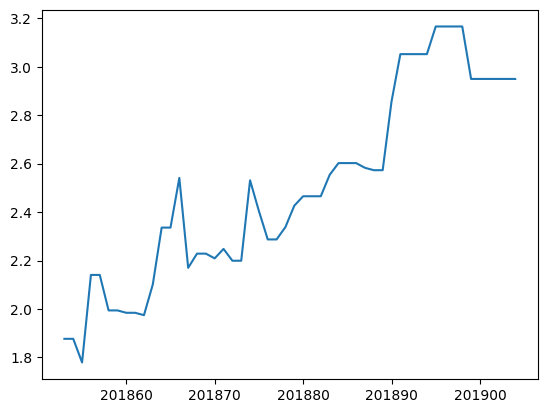

In [21]:
# Check that we get coherent results
df_for_app[df_for_app['symbol']=='A17U.SI']['stockPrice'].plot()

In [22]:
# Export the csv for the app
# df_for_app.to_csv('for_app.csv')